In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
obs = pd.read_csv('../Resources/ObsSST.csv')
obs = obs.drop([obs.index[0],obs.index[-1]])
obs

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
1,1990,12,22.31,-0.50,25.15,-0.08,29.19,0.65,26.95,0.35
2,1991,1,24.02,-0.54,25.79,0.13,28.90,0.58,27.03,0.49
3,1991,2,25.72,-0.38,26.41,0.00,28.73,0.54,27.07,0.32
4,1991,3,26.28,-0.21,27.04,-0.16,28.66,0.34,27.32,0.03
5,1991,4,25.24,-0.30,27.53,-0.05,28.97,0.34,28.01,0.19
...,...,...,...,...,...,...,...,...,...,...
358,2020,9,19.50,-1.22,23.91,-0.99,28.21,-0.55,25.89,-0.83
359,2020,10,20.42,-0.60,23.88,-1.10,27.96,-0.80,25.46,-1.26
360,2020,11,21.07,-0.58,23.90,-1.21,27.80,-0.90,25.28,-1.42
361,2020,12,22.21,-0.60,24.41,-0.82,27.54,-1.00,25.44,-1.15


In [51]:
mean_nino3_4 = obs.groupby('MON')['NINO3.4'].mean().reset_index()
mean_nino3_4

,MON,NINO3.4
0,1,26.512258
1,2,26.752333
2,3,27.283000
3,4,27.818667
4,5,27.933333
5,6,27.726667
6,7,27.293333
7,8,26.855000
8,9,26.718667
9,10,26.716333


In [52]:
mean_nino3_4['runningAvg']=mean_nino3_4['NINO3.4'].rolling(window=3, center=True).mean()
mean_nino3_4

,MON,NINO3.4,runningAvg
0,1,26.512258,NaN
1,2,26.752333,26.849197
2,3,27.283000,27.284667
3,4,27.818667,27.678333
4,5,27.933333,27.826222
5,6,27.726667,27.651111
6,7,27.293333,27.291667
7,8,26.855000,26.955667
8,9,26.718667,26.763333
9,10,26.716333,26.712556


In [53]:
SZN = ['NDJ','DJF','JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON','OND']
num_repeats = len(obs) // len(SZN)+1
SZN_list = (SZN*num_repeats)[:len(obs)]
obs['SZN'] = SZN_list
obs

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3,SZN
1,1990,12,22.31,-0.50,25.15,-0.08,29.19,0.65,26.95,0.35,NDJ
2,1991,1,24.02,-0.54,25.79,0.13,28.90,0.58,27.03,0.49,DJF
3,1991,2,25.72,-0.38,26.41,0.00,28.73,0.54,27.07,0.32,JFM
4,1991,3,26.28,-0.21,27.04,-0.16,28.66,0.34,27.32,0.03,FMA
5,1991,4,25.24,-0.30,27.53,-0.05,28.97,0.34,28.01,0.19,MAM
...,...,...,...,...,...,...,...,...,...,...,...
358,2020,9,19.50,-1.22,23.91,-0.99,28.21,-0.55,25.89,-0.83,ASO
359,2020,10,20.42,-0.60,23.88,-1.10,27.96,-0.80,25.46,-1.26,SON
360,2020,11,21.07,-0.58,23.90,-1.21,27.80,-0.90,25.28,-1.42,OND
361,2020,12,22.21,-0.60,24.41,-0.82,27.54,-1.00,25.44,-1.15,NDJ


In [54]:
obs['NINO3.4_L3']=obs['NINO3.4'].rolling(window=3, center=True).mean()
obs['NINO1.2_L3']=obs['NINO1+2'].rolling(window=3, center=True).mean()
obs['NINO3_L3']=obs['NINO3'].rolling(window=3, center=True).mean()
obs['NINO4_L3']=obs['NINO4'].rolling(window=3, center=True).mean()

obs

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3,SZN,NINO3.4_L3,NINO1.2_L3,NINO3_L3,NINO4_L3
1,1990,12,22.31,-0.50,25.15,-0.08,29.19,0.65,26.95,0.35,NDJ,NaN,NaN,NaN,NaN
2,1991,1,24.02,-0.54,25.79,0.13,28.90,0.58,27.03,0.49,DJF,27.016667,24.016667,25.783333,28.940000
3,1991,2,25.72,-0.38,26.41,0.00,28.73,0.54,27.07,0.32,JFM,27.140000,25.340000,26.413333,28.763333
4,1991,3,26.28,-0.21,27.04,-0.16,28.66,0.34,27.32,0.03,FMA,27.466667,25.746667,26.993333,28.786667
5,1991,4,25.24,-0.30,27.53,-0.05,28.97,0.34,28.01,0.19,MAM,27.843333,25.203333,27.353333,29.003333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2020,9,19.50,-1.22,23.91,-0.99,28.21,-0.55,25.89,-0.83,ASO,25.870000,19.960000,24.096667,28.213333
359,2020,10,20.42,-0.60,23.88,-1.10,27.96,-0.80,25.46,-1.26,SON,25.543333,20.330000,23.896667,27.990000
360,2020,11,21.07,-0.58,23.90,-1.21,27.80,-0.90,25.28,-1.42,OND,25.393333,21.233333,24.063333,27.766667
361,2020,12,22.21,-0.60,24.41,-0.82,27.54,-1.00,25.44,-1.15,NDJ,25.423333,22.320000,24.450000,27.536667


In [55]:
SZN = ['DJF','JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND','NDJ']
mean_nino3_4['SZN'] = SZN
#mean_nino3_4['avg_by_SZN'] = obs.groupby('SZN')['NINO3.4_SZN'].mean()
mean_nino3_4

,MON,NINO3.4,runningAvg,SZN
0,1,26.512258,NaN,DJF
1,2,26.752333,26.849197,JFM
2,3,27.283000,27.284667,FMA
3,4,27.818667,27.678333,MAM
4,5,27.933333,27.826222,AMJ
5,6,27.726667,27.651111,MJJ
6,7,27.293333,27.291667,JJA
7,8,26.855000,26.955667,JAS
8,9,26.718667,26.763333,ASO
9,10,26.716333,26.712556,SON


In [56]:
NINO3_4_L3 = obs.groupby('MON')['NINO3.4_L3'].mean().reset_index()
NINO1_2_L3 = obs.groupby('MON')['NINO1.2_L3'].mean().reset_index()
NINO3_L3 = obs.groupby('MON')['NINO3_L3'].mean().reset_index()
NINO4_L3 = obs.groupby('MON')['NINO4_L3'].mean().reset_index()

NINO1_2_L3

,MON,NINO1.2_L3
0,1,24.495222
1,2,25.717667
2,3,26.041222
3,4,25.479778
4,5,24.358667
5,6,23.166333
6,7,22.029889
7,8,21.230444
8,9,20.918111
9,10,21.135889


In [57]:
mean_nino3_4['NINO3.4_L3'] = NINO3_4_L3['NINO3.4_L3']
mean_nino3_4

,MON,NINO3.4,runningAvg,SZN,NINO3.4_L3
0,1,26.512258,NaN,DJF,26.648667
1,2,26.752333,26.849197,JFM,26.859889
2,3,27.283000,27.284667,FMA,27.284667
3,4,27.818667,27.678333,MAM,27.678333
4,5,27.933333,27.826222,AMJ,27.826222
5,6,27.726667,27.651111,MJJ,27.651111
6,7,27.293333,27.291667,JJA,27.291667
7,8,26.855000,26.955667,JAS,26.955667
8,9,26.718667,26.763333,ASO,26.763333
9,10,26.716333,26.712556,SON,26.712556


In [58]:
var_by_szn = obs.groupby('MON')['NINO3.4_L3'].var().reset_index()
var_by_szn

,MON,NINO3.4_L3
0,1,1.230987
1,2,0.911147
2,3,0.569984
3,4,0.338432
4,5,0.256750
5,6,0.281245
6,7,0.401165
7,8,0.576438
8,9,0.797956
9,10,1.057599


In [65]:
SZN = ['DJF','JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND','NDJ']
NINO1_2_L3['SZN'] = SZN
NINO3_4_L3['SZN'] = SZN
NINO3_L3['SZN'] = SZN
NINO4_L3['SZN'] = SZN
NINO1_2_L3

,MON,NINO1.2_L3,SZN
0,1,24.495222,DJF
1,2,25.717667,JFM
2,3,26.041222,FMA
3,4,25.479778,MAM
4,5,24.358667,AMJ
5,6,23.166333,MJJ
6,7,22.029889,JJA
7,8,21.230444,JAS
8,9,20.918111,ASO
9,10,21.135889,SON


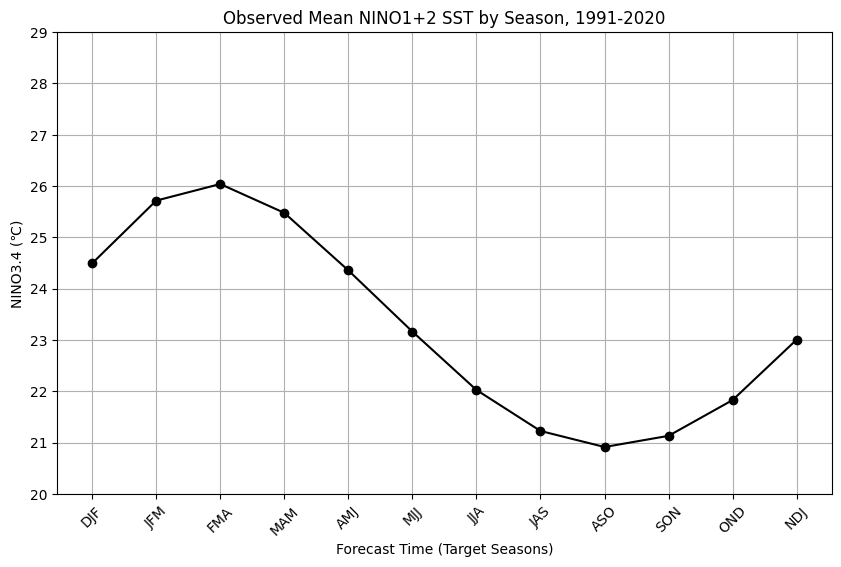

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(NINO1_2_L3['SZN'], NINO1_2_L3['NINO1.2_L3'], marker='o', linestyle='-', color='black')

# Customize the plot
plt.title('Observed Mean NINO1+2 SST by Season, 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('NINO3.4 (℃)')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(ymin=20, ymax=29)

# Show the plot
plt.show()

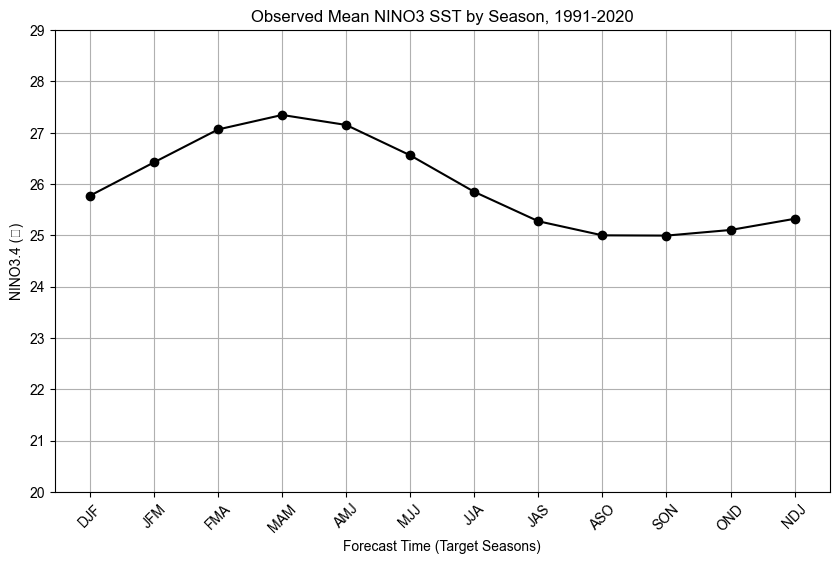

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(NINO3_L3['SZN'], NINO3_L3['NINO3_L3'], marker='o', linestyle='-', color='black')

# Customize the plot
plt.title('Observed Mean NINO3 SST by Season, 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('NINO3.4 (℃)')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(ymin=20, ymax=29)
# Show the plot
plt.show()

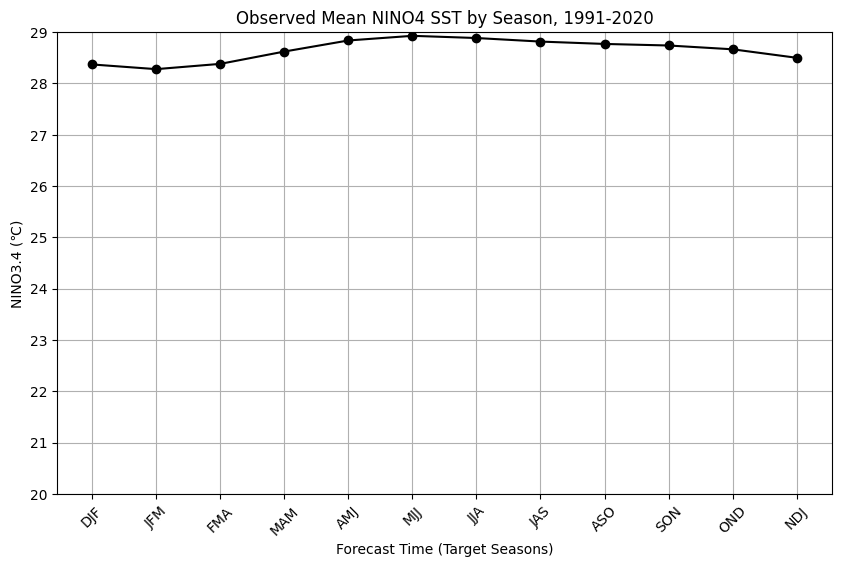

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(NINO4_L3['SZN'], NINO4_L3['NINO4_L3'], marker='o', linestyle='-', color='black')

# Customize the plot
plt.title('Observed Mean NINO4 SST by Season, 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('NINO3.4 (℃)')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(ymin=20, ymax=29)
# Show the plot
plt.show()

In [60]:
mean_nino3_4['VARIANCE_L3'] = var_by_szn['NINO3.4_L3']
mean_nino3_4

,MON,NINO3.4,runningAvg,SZN,NINO3.4_L3,VARIANCE_L3
0,1,26.512258,NaN,DJF,26.648667,1.230987
1,2,26.752333,26.849197,JFM,26.859889,0.911147
2,3,27.283000,27.284667,FMA,27.284667,0.569984
3,4,27.818667,27.678333,MAM,27.678333,0.338432
4,5,27.933333,27.826222,AMJ,27.826222,0.256750
5,6,27.726667,27.651111,MJJ,27.651111,0.281245
6,7,27.293333,27.291667,JJA,27.291667,0.401165
7,8,26.855000,26.955667,JAS,26.955667,0.576438
8,9,26.718667,26.763333,ASO,26.763333,0.797956
9,10,26.716333,26.712556,SON,26.712556,1.057599


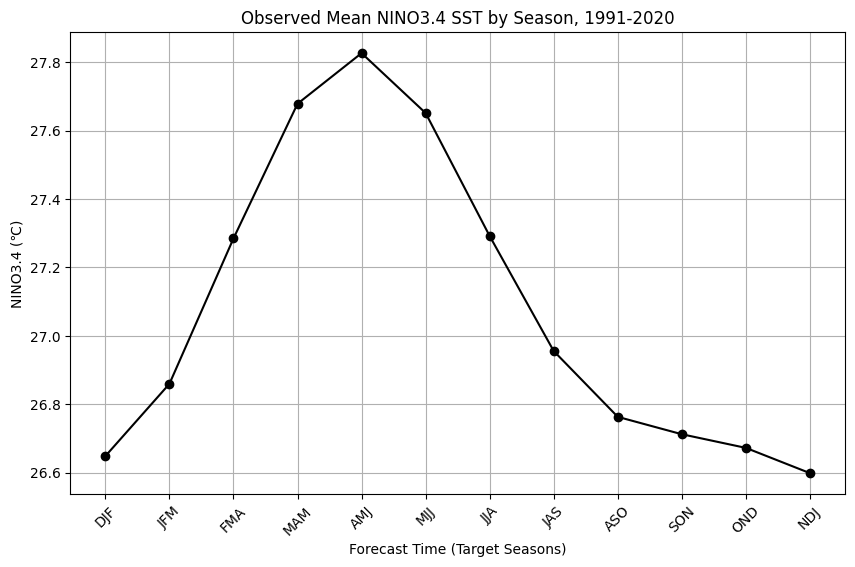

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(mean_nino3_4['SZN'], mean_nino3_4['NINO3.4_L3'], marker='o', linestyle='-', color='black')

# Customize the plot
plt.title('Observed Mean NINO3.4 SST by Season, 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('NINO3.4 (℃)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

#draw same graph for all lead months from 0.5-10.5 

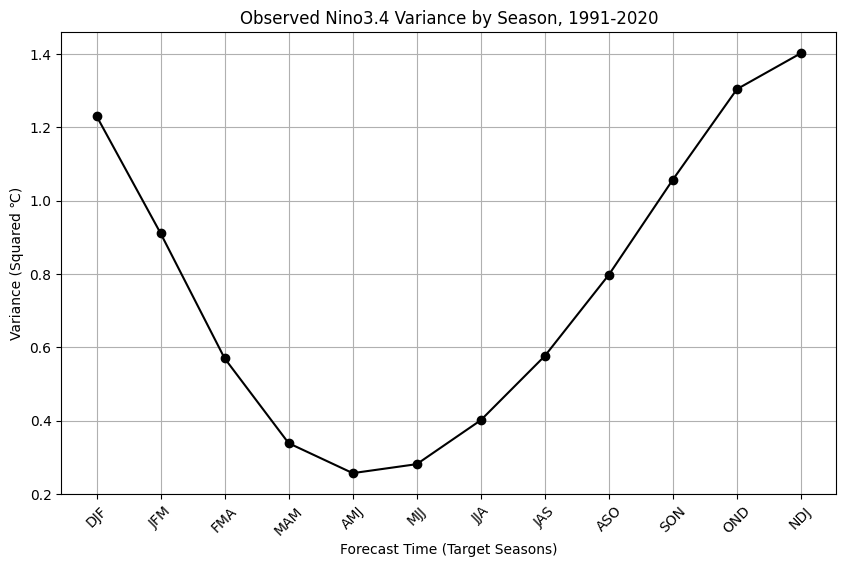

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(mean_nino3_4['SZN'], mean_nino3_4['VARIANCE_L3'], marker='o', linestyle='-', color='black')

# Customize the plot
plt.title('Observed Nino3.4 Variance by Season, 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('Variance (Squared ℃)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [63]:
mean_nino3_4.to_csv('../Resources/obs_nino3_4.csv', index=False)